In [5]:
import numpy as np
import matplotlib.pyplot as plt

# import the libraries necessary for random choice
import random

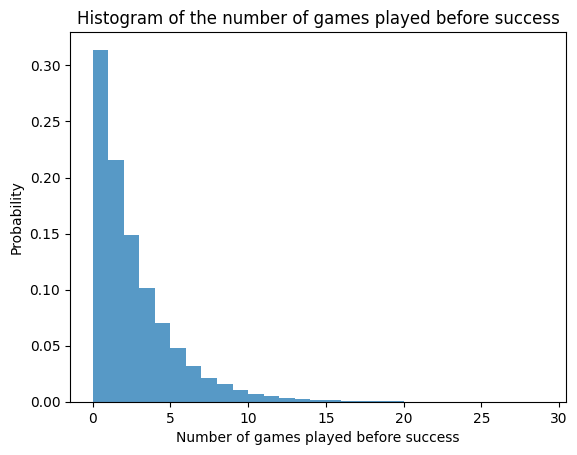

In [80]:
p_success = 12 / 38 # thirds betting on roulette
p_fail = 1 - p_success

# histogram of the number of games played before success
n = 100000
games = np.zeros(n)
for i in range(n):
    # keep choosing a random number from 1 to 38 until we get between 1 and 12
    count = 0
    while random.randint(1, 38) > 12:
        count += 1
    games[i] = count

plt.hist(games, bins=range(30), density=True, alpha=0.75)
plt.xlabel('Number of games played before success')
plt.ylabel('Probability')
plt.title('Histogram of the number of games played before success')
plt.show()


In [106]:
fib_list = [2, 3]
def fibonacci(n):
    if n < len(fib_list):
        return fib_list[n]
    else:
        fib_list.append(fibonacci(n-1) + fibonacci(n-2))
        return fib_list[n]
    
def exponential_bet(n):
    return 2**n

def roulette_run(starting_tokens = 200, max_iter = 100):
    tokens = starting_tokens
    tokens_list = []
    seq_id = 0
    for i in range(max_iter):
        if tokens <= 0:
            tokens_list.append(0)
            continue
        tokens_list.append(tokens)
        bet = fibonacci(seq_id) # CHANGE HERE FOR DIFFERENT BETTING STRATEGIES
        if random.randint(1, 38) > 12:
            tokens -= bet
            seq_id += 1
        else:
            tokens += 3*bet
            seq_id = 0
    return tokens_list

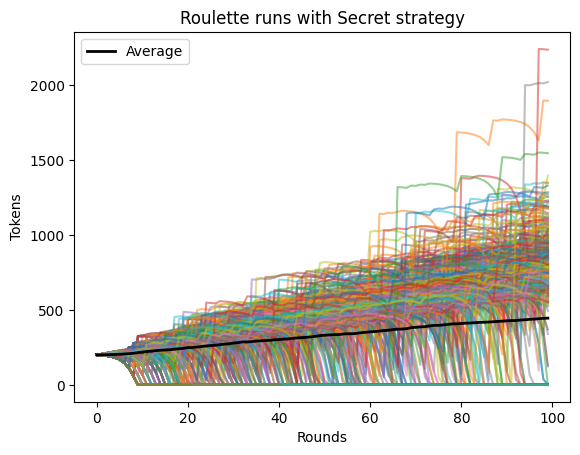

In [117]:
# run the roulette game a few times and plot the results on the same graph
n_runs = 1000
max_iter = 100
starting_tokens = 200
results_array = np.zeros((n_runs, max_iter))
for i in range(n_runs):
    results_array[i] = roulette_run(starting_tokens=starting_tokens, max_iter=max_iter)
    plt.plot(roulette_run(starting_tokens=200, max_iter=100), alpha=0.5)
# calculate average and plot on same plot
average = np.mean(results_array, axis=0)
plt.plot(average, color='black', linewidth=2, label='Average')
plt.title('Roulette runs with Secret strategy')
plt.xlabel('Rounds')
plt.ylabel('Tokens')
plt.legend()
plt.show()

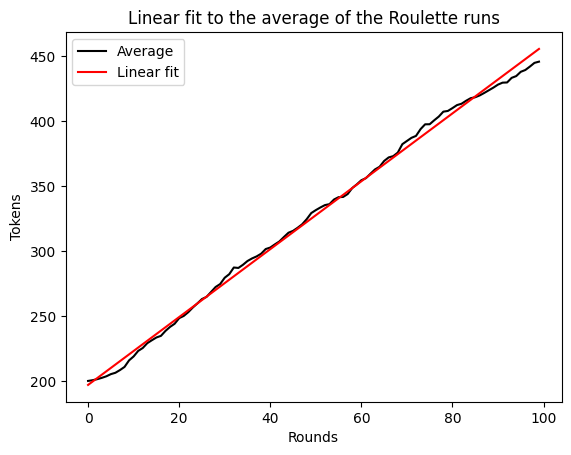

The slope of the linear fit is 2.61 and the y-intercept is 196.93


In [121]:
# fit a line to the average
x = np.arange(max_iter)
m, b = np.polyfit(x, average, 1)
plt.plot(average, label='Average', color='black')
plt.plot(m*x + b, label='Linear fit', color='red')
plt.title('Linear fit to the average of the Roulette runs')
plt.xlabel('Rounds')
plt.ylabel('Tokens')
plt.legend()
plt.show()

print(f'The slope of the linear fit is {m:.2f} and the y-intercept is {b:.2f}')